## Laboratorium nr 4

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from time import time
from math import sqrt
from pprint import pprint

### Wczytywanie macierzy

In [140]:
def load_base_matrix(type_, number):  
    return np.genfromtxt(type_+number+'.csv', delimiter=',')

def generate_matrix(A, q):
    return np.block([[A] * q] * q)

## Macierz FEM
### Załadujmy naszą macierz testową A

## $ A \cdot A: $

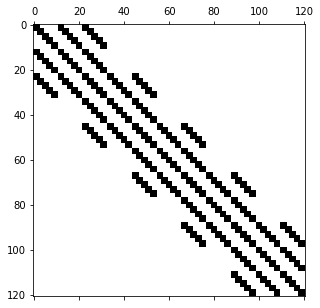

In [316]:
A = load_base_matrix('fem', '5')
fig, axs = plt.subplots(figsize = (5, 5))
axs.spy(A)
plt.show()

## Zamiana macierzy numpy na listę pythonową

In [318]:
A_list = A.tolist()

In [143]:
print(A_list)

[[0.009999999999999998, 0.005, 0.001666666666666667, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004999999999999999, 0.0025, 0.0008333333333333334, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001666666666666666, 0.0008333333333333334, 0.0002777777777777779, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.004999999999999999, 0.006666666666666666, 0.005, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0025, 0.003333333333333334, 0.0025, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008333333333333334, 0.001111111111111112, 0.0008333333333333336, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

## Konwersja macierzy z tablicy 2d na macierz rządką CSR

In [5]:
def csr_convert(M_list):
    n = len(M_list)
    values = []
    col_index = []
    row_index = [0]
    for row_i in range(n):
        if row_i != 0:
            row_index.append(len(values))
        for col_i in range(n):
            val = M_list[row_i][col_i] 
            if val == 0:
                continue
            values.append(val)
            col_index.append(col_i)
    row_index.append(len(values))
    return values, col_index, row_index
            

In [6]:
print(csr_convert([[5,0,0,0], [0, 8,0,0], [0,0,3,0], [0,6,0,0]])) #przykład z Wikipedii

([5, 8, 3, 6], [0, 1, 2, 1], [0, 1, 2, 3, 4])


## Faktoryzacja Cholesky'ego na macierzy gęstej

In [59]:
# def cholesky_dense(A):
#     n = len(A)

#     L = [[0.0] * n for i in range(n)]

#     for i in range(n):
#         for k in range(i+1):
#             tmp_sum = sum(L[i][j] * L[k][j] for j in range(k))
            
#             if i == k: 
#                 L[i][k] = sqrt(A[i][i] - tmp_sum)
#             else:
#                 L[i][k] = (1.0 / L[k][k] * (A[i][k] - tmp_sum))
#     return L

In [235]:
 
A = [[6, 0,0,0], 
     [3, 6, 0,0], 
     [4, 5, 10, 0], 
     [8, 1, 7, 25]]
L = cholesky_dense(A)

print("A:")
pprint(A)

print("L:")
pprint(L)

A:
[[6, 0, 0, 0], [3, 6, 0, 0], [4, 5, 10, 0], [8, 1, 7, 25]]
L:
[[2.449489742783178, 0.0, 0.0, 0.0],
 [1.2247448713915892, 2.1213203435596424, 0.0, 0.0],
 [1.6329931618554523, 1.414213562373095, 2.309401076758503, 0.0],
 [3.2659863237109046,
  -1.4142135623730956,
  1.5877132402714704,
  3.1324910215354165]]


## Faktoryzacja Cholesky'ego na macierzy rzadkiej (sparse) - format CSR

In [145]:
def value(V, C, R, i, j):
    for x in range(R[i], R[i+1]):
        if C[x] == j:
            return V[x]
    return 0

def cholesky_dense(A):
    n = len(A)
    L = [[0.0] * n for i in range(n)]
    for i in range(n):
        for k in range(i+1):
            tmp_sum = sum(L[i][j] * L[k][j] for j in range(k))
            if i == k: 
                L[i][k] = sqrt(A[i][i] - tmp_sum)
            else:
                L[i][k] = (1.0 / L[k][k] * (A[i][k] - tmp_sum))
    return L

def cholesky_sparse(V, C, R):
    n = len(R) - 1
    L = [[0.0] * n for i in range(n)]
    for i in range(n):
        for k in range(i+1):
            tmp_sum = sum(L[i][j] * L[k][j] for j in range(k))
            if i == k: 
                L[i][k] = sqrt(value(V,C,R,i,i) - tmp_sum)
            else:
                L[i][k] = (1.0 / L[k][k] * (value(V,C,R,i,k) - tmp_sum))
    return L
            

In [165]:
def cholesky_sparse_v2(V, C, R):
    n = len(R) - 1
    L = [[0.0] * n for i in range(n)]
    for i in range(n):
        for k in range(i+1):
            a = R[i]
            b = R[k]
            s = 0
            while (a < R[i+1] and b < R[k+1]) and (C[a] < k and C[b] < k):
                if C[a] == C[b]:
                    s += L[i][C[a]] * L[k][C[b]]
                    a+=1
                    b+=1
                elif C[a] < C[b]:
                    a+=1
                else:
                    b+=1
            if i == k: 
                L[i][k] = sqrt(value(V,C,R,i,i) - s)
            else:
                L[i][k] = (1.0 / L[k][k] * (value(V,C,R,i,k) - s))
    return L

In [124]:
A = [[6, 3, 4, 8], [3, 6, 5, 1], [4, 5, 10, 7], [8, 1, 7, 25]]
V,C,R = csr_convert(A)
print("CSR format:")
print(V,C,R)

CSR format:
[6, 3, 4, 8, 3, 6, 5, 1, 4, 5, 10, 7, 8, 1, 7, 25] [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3] [0, 4, 8, 12, 16]


In [99]:
print(value(V,C,R,1,2))

5


In [136]:
L = cholesky_sparse_v2(V,C,R)
pprint(L)

0
0
1.5000000000000002
0
2.0000000000000004
4.666666666666667
0
4.000000000000001
3.3333333333333344
15.187500000000004
[[2.449489742783178, 0.0, 0.0, 0.0],
 [1.2247448713915892, 2.1213203435596424, 0.0, 0.0],
 [1.6329931618554523, 1.414213562373095, 2.309401076758503, 0.0],
 [3.2659863237109046,
  -1.4142135623730956,
  1.5877132402714704,
  3.1324910215354165]]


In [146]:

cholesky_dense(A_list)

[[0.09999999999999999,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.04999999999999999,
  0.06454972243679029,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,

In [282]:
def test_dense(M):
    st = time()
    L = cholesky_dense(M)
    print(time() - st)
    L = [[round(x,4) for x in l] for l in L]
    return L
    
def test_sparse(V,C,R):
    st = time()
    L = cholesky_sparse_v2(V,C,R)
    print(time() - st)
    L = [[round(x,4) for x in l] for l in L]
    return L

In [324]:
V,C,R = csr_convert(A_list)
LS = test_sparse(V,C,R)

0.018997907638549805


In [365]:
LD = test_dense(A_list)

0.04605865478515625


In [285]:
LS = np.array(LS)
LD = np.array(LD)

In [288]:
print(LS[15])

[ 0.      0.      0.      0.      0.0066  0.0314  0.063   0.     -0.
  0.      0.      0.      0.      0.0085  0.0405  0.0814  0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.    ]


In [289]:
print(LD[15])

[0.0, 0.0, 0.0, 0.0, 0.0066, 0.0314, 0.063, 0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0085, 0.0405, 0.0814, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [248]:
print(LD)

[[0.1        0.         0.         ... 0.         0.         0.        ]
 [0.05       0.06454972 0.         ... 0.         0.         0.        ]
 [0.01666667 0.06454972 0.12472191 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.0967708  0.         0.        ]
 [0.         0.         0.         ... 0.0304459  0.05478515 0.        ]
 [0.         0.         0.         ... 0.01014863 0.04813877 0.05892548]]


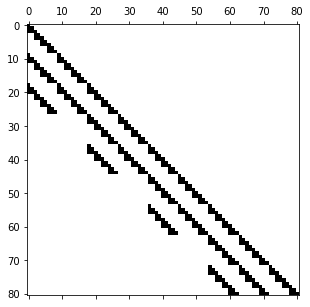

In [290]:
fig, axs = plt.subplots(figsize = (5, 5))
axs.spy(LS)
plt.show()

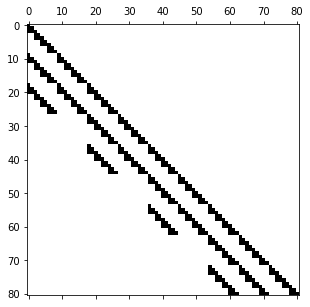

In [291]:
fig, axs = plt.subplots(figsize = (5, 5))
axs.spy(LD)
plt.show()